# Assignment 3
Feygelman Andrey
gh link: https://github.com/Andrey862/assig3

## Imports and helper functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numba import njit

In [2]:
import json
with open('russia.json') as f:
    russia = json.load(f)
def draw_russia():
    # discard the Kaliningrad
    for e in russia[0]['geojson']['coordinates'][4:]:
        plt.plot(*list(zip(*e[0])), color = 'blue')

In [3]:
dataset = pd.read_csv('city/city.csv')

In [4]:
dataset = dataset.sort_values(by = ['population'], ascending=False)[:30]

In [5]:
dataset = dataset.reset_index(drop=True)

In [6]:
dataset

,address,postal_code,country,federal_district,region_type,region,area_type,area,city_type,city,...,fias_level,capital_marker,okato,oktmo,tax_office,timezone,geo_lat,geo_lon,population,foundation_year
0,г Москва,101000.0,Россия,Центральный,г,Москва,NaN,NaN,NaN,NaN,...,1,0,45000000000,45000000,7700,UTC+3,55.754047,37.620405,11514330,1147
1,г Санкт-Петербург,190000.0,Россия,Северо-Западный,г,Санкт-Петербург,NaN,NaN,NaN,NaN,...,1,0,40000000000,40000000,7800,UTC+3,59.939131,30.315900,4848742,1703
2,г Новосибирск,630000.0,Россия,Сибирский,обл,Новосибирская,NaN,NaN,г,Новосибирск,...,4,2,50401000000,50701000001,5400,UTC+7,55.028191,82.921149,1498921,1893
3,г Екатеринбург,620000.0,Россия,Уральский,обл,Свердловская,NaN,NaN,г,Екатеринбург,...,4,2,65401000000,65701000001,6600,UTC+5,56.838522,60.605491,1377738,1723
4,г Нижний Новгород,603000.0,Россия,Приволжский,обл,Нижегородская,NaN,NaN,г,Нижний Новгород,...,4,2,22401000000,22701000001,5200,UTC+3,56.324063,44.005391,1250615,1221
5,г Казань,420000.0,Россия,Приволжский,Респ,Татарстан,NaN,NaN,г,Казань,...,4,2,92401000000,92701000001,1600,UTC+3,55.794358,49.111497,1216965,1005
6,г Самара,443000.0,Россия,Приволжский,обл,Самарская,NaN,NaN,г,Самара,...,4,2,36401000000,36701000,6300,UTC+4,53.195031,50.106952,1164900,1586
7,г Омск,644000.0,Россия,Сибирский,обл,Омская,NaN,NaN,г,Омск,...,4,2,52401000000,52701000001,5500,UTC+6,54.984857,73.367452,1154000,1716
8,г Челябинск,454000.0,Россия,Уральский,обл,Челябинская,NaN,NaN,г,Челябинск,...,4,2,75401000000,75701000001,7400,UTC+5,55.160262,61.400808,1130273,1736
9,г Ростов-на-Дону,344000.0,Россия,Южный,обл,Ростовская,NaN,NaN,г,Ростов-на-Дону,...,4,2,60401000000,60701000001,6100,UTC+3,47.222457,39.718803,1091544,1749


In [7]:
from numpy import sin, cos, arccos, abs
from functools import lru_cache
N = len(dataset)

# I love when program spends 99% of its time inside pandas.read()! GOD BLESS PROFILER
lat = list(dataset['geo_lat'])
lon =  list(dataset['geo_lon'])
 
@lru_cache(maxsize = None)
def distance(i, j):
    # Returns distance in kilometres
    # using Great-circle distance formula from wikipedia
    f1 = lat[i]
    f2 = lat[j]
    l1 = lon[i]
    l2 = lon[j]
    angle = arccos(sin(f1)*sin(f2) + cos(f1)*cos(f2)*cos(abs(l1 - l2)))
    r = 6371
    return angle*r

In [8]:
distances = np.zeros((N,N), dtype = float)
# O(N^2), hell yea!
for i in range(N):
    for j in range(N):
        distances[i, j] = distance(i,j)

/tmp/ipykernel_1067/2508226629.py:17: RuntimeWarning: invalid value encountered in arccos
  angle = arccos(sin(f1)*sin(f2) + cos(f1)*cos(f2)*cos(abs(l1 - l2)))


# Training function
Scedualer is geometric and the energy distribution is the same as defined in the assignment

$p(path) = exp(-dist(path)/T)$

$T_{t+1} = T_{t} * c$ where "c" is cooling coefficient

In [9]:
@njit
def dist(path):
    # badass numba optimization
    # Turns out that build-in function sum() is just too slow ... bruh
    s = 0
    for i in range(N):
        s += distances[path[i], path[(i+1)%N]]
    return s

I did the math

### $p(swith) = 
\frac{Energy_{new}}{Energy_{old}} = 
\frac{exp(-dist(path_{new})/T)}{exp(-dist(path_{old})/T} =
exp(\frac{-dist(path_{new}) + dist(path_{old})}{T})
$ 

In [10]:
class Path:
    def __init__(self, l = None):
        if l is None: 
            self.path = list(range(N))
            np.random.shuffle(self.path)
        else: 
            self.path = l
        
        # glory to the profiler!
        if (not isinstance(self.path, np.ndarray)):
            self.path = np.array(self.path)
        
        self.dist = self._dist()
    
    def _dist(self):
        return dist(self.path)
    
#     def energy(self, T):
#         return np.exp(-self.dist/T)
    
    def propose(self):
        new_path = self.path.copy()
        i, j = np.random.randint(0, N-1), np.random.randint(0, N-1)
        new_path[i], new_path[j] = new_path[j], new_path[i]
        return Path(new_path)
    
    def next(self, T):
        proposal = self.propose()
        
        # equivalent of "a = np.exp((proposal.dist - self.dist)/T)"
        diff = self.dist - proposal.dist
        if (diff < 0):
            a = np.exp(diff/T) 
        else:
            # In case if difference is positive, calculating exponent is wasteful
            a = 2
        
        if (np.random.random() <= a):
            return proposal
        else:
            return self

In [11]:
from tqdm import tqdm
class Train:
    def __init__(self, l=None, init_T = None, cooloing = 0.99, epochs = 100, cooling_by_final_T = None, use_tqdm = True):
        path = Path(l)
        if (init_T is None):
            init_T = path.dist
            
        if (cooling_by_final_T is not None):
            # this allows to adjust the cooloing geometric coefficient according to desired final temperature
            cooloing = np.exp(np.log(cooling_by_final_T/init_T) / epochs)
            if (use_tqdm): print('cooloing geometric coefficient = ', cooloing)
        else:
            if (use_tqdm): print('final_T = ', init_T * cooloing**epochs)
            pass
        
        T = init_T
        self.scores = []
        self.temperature = []
        for _ in tqdm(list(range(epochs)), disable = not use_tqdm):
            self.scores.append(path.dist)
            self.temperature.append(T)
            path = path.next(T)
            T = cooloing * T
        self.path = path

## Test different cooling speeds

In [17]:
a = Train(cooling_by_final_T = 1, epochs = 5_000_000, init_T = 500_000)

cooloing geometric coefficient =  0.9999973755307684


100%|██████████████████████████████████████████████████████████████████████| 5000000/5000000 [00:55<00:00, 89844.27it/s]


In [18]:
a.scores[-1]

85584.34025100023

In [12]:
very_slow = Train(cooling_by_final_T = 500, epochs = 5_000_000, init_T = 500_000)

cooloing geometric coefficient =  0.9999986184498986


100%|█████████████████████████████████████████████████████████████████████| 5000000/5000000 [00:49<00:00, 101087.61it/s]


In [13]:
slow = Train(cooling_by_final_T = 100, epochs = 5_000_000, init_T = 500_000)

cooloing geometric coefficient =  0.9999982965628126


100%|█████████████████████████████████████████████████████████████████████| 5000000/5000000 [00:49<00:00, 101560.64it/s]


In [14]:
middle_speed = Train(cooling_by_final_T = 0.1, epochs = 5_000_000, init_T = 500_000)

cooloing geometric coefficient =  0.9999969150150645


100%|██████████████████████████████████████████████████████████████████████| 5000000/5000000 [00:51<00:00, 96907.97it/s]


In [15]:
fast = Train(cooling_by_final_T = 0.001, epochs = 5_000_000, init_T = 500_000)

cooloing geometric coefficient =  0.9999959939842928


100%|██████████████████████████████████████████████████████████████████████| 5000000/5000000 [00:54<00:00, 91870.18it/s]


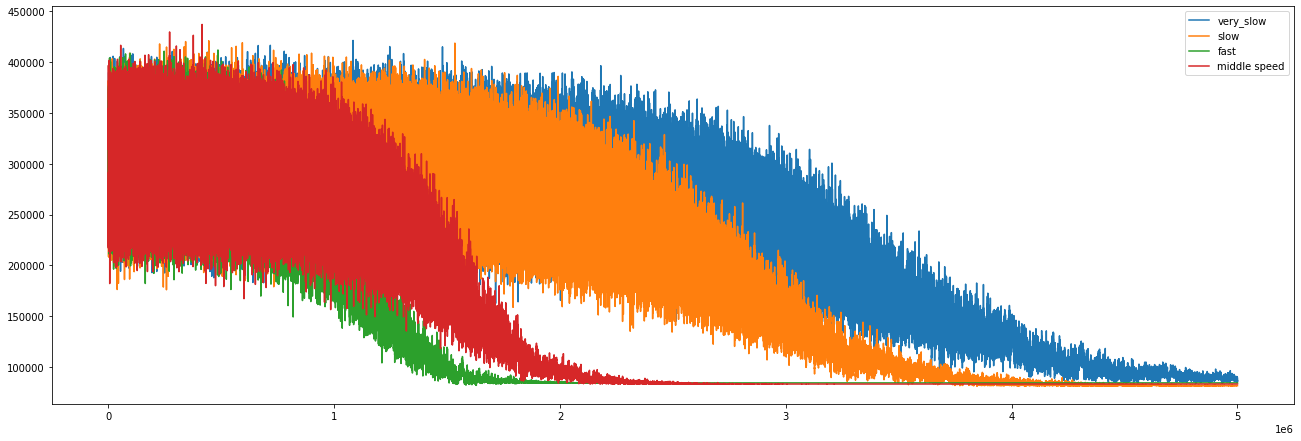

In [16]:
plt.subplots_adjust(right = 3, bottom = -0.5)
plt.plot(very_slow.scores, label = 'very_slow')
plt.plot(slow.scores, label = 'slow')
plt.plot(fast.scores, label = 'fast')
plt.plot(middle_speed.scores, label = 'middle speed')
# plt.yscale('log')
plt.legend()

In [17]:
names = ['very_slow', 'slow', 'middle', 'fast']
scores = [very_slow.scores[-1], slow.scores[-1], middle_speed.scores[-1], fast.scores[-1]]
df = pd.DataFrame(data = {'names': names, 'total distance (in km)': scores})
df

,names,total distance (in km)
0,very_slow,86442.362244
1,slow,81418.567898
2,middle,83098.844138
3,fast,84230.058310


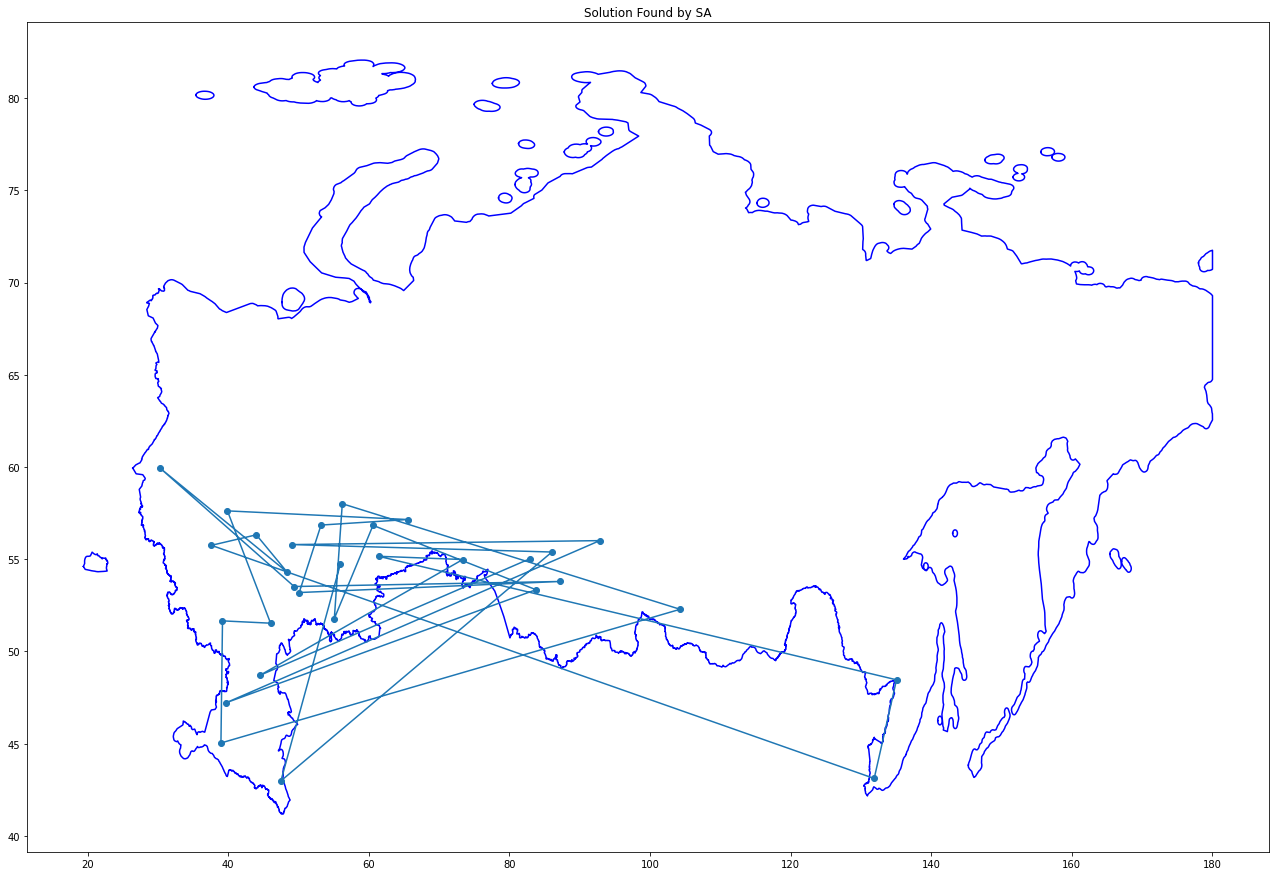

In [18]:
plt.subplots_adjust(right = 3, bottom = -2)
draw_russia()
plt.title('Solution Found by SA')
plt.plot(dataset['geo_lon'][slow.path.path], dataset['geo_lat'][slow.path.path], '-o')

# Animation
A bit of dirty code to make a video simulation

In [55]:
%matplotlib inline

In [19]:
from tqdm import tqdm
def Train_Generator(l=None, init_T = None, cooloing = 0.99, epochs = 100, cooling_by_final_T = None, use_tqdm = False):
    path = Path(l)
    if (init_T is None):
        init_T = path.dist

    if (cooling_by_final_T is not None):
        # this allows to adjust the cooloing geometric coefficient according to desired final temperature
        cooloing = np.exp(np.log(cooling_by_final_T/init_T) / epochs)
        print('cooloing geometric coefficient = ', cooloing)
    else:
        print('final_T = ', init_T * cooloing**epochs)
        pass

    T = init_T
    for _ in tqdm(list(range(epochs)), disable = not use_tqdm):
        path = path.next(T)
        T = cooloing * T
        yield path.dist, T, path.path

In [23]:
epochs = 5_000_000
vid_length_in_sec = 60
fps = 20
frames = vid_length_in_sec * fps
take_each = int(epochs / frames)

In [24]:
gen = Train_Generator(cooling_by_final_T = 100, epochs = 5_000_000, init_T = 500_000, use_tqdm = True)

In [25]:
def take_each_gen(gen, take_each):
    for i,e in enumerate(gen):
        if i%take_each == 0:
            yield i, *e
            
gen = take_each_gen(gen, take_each)

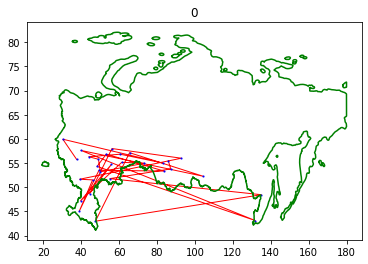

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
# %matplotlib notebook

fig, ax = plt.subplots()

x = np.array(dataset['geo_lon'])
y = np.array(dataset['geo_lat'])
line, = ax.plot(x, y, '-', linewidth=1, color = 'red')
line2, = ax.plot(x, y, 's', linewidth=1, color = 'blue', markersize=1)
ax.set_title(0)

for e in russia[0]['geojson']['coordinates'][4:]:
    ax.plot(*list(zip(*e[0])), color = 'green')

def animate(i):
    epoch, distance, T, path = next(gen)
    distance/= 10**6
    line.set_ydata(y[path])
    line.set_xdata(x[path])
    ax.set_title(f'{epoch = }; {distance = :.2f} mil km; {T = :.0f}')
    return line, 


def init():
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, frames), init_func=init,
                              interval=25, blit=True)
# plt.show()

In [27]:
# writervideo = animation.PillowWriter(fps = fps)
# ani.save(r'./test3.gif', writer=writervideo, dpi = 100)

In [28]:
writervideo = animation.FFMpegWriter(fps = fps)
ani.save(r'./result.mp4', writer=writervideo, dpi = 400)

cooloing geometric coefficient =  0.9999982965628126


100%|█████████████████████████████████████████████████████████████████████▊| 4988747/5000000 [04:41<00:00, 17307.43it/s]